### Problem statement: Will a customer subscribe to a term deposit or not?

In this notebbok, we have data from a portugese banking agency with numerous independent variable and the goal is to predict whether the client will subscribe to the term deposit or not.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
sns.set_style("darkgrid")

In [32]:
#Looking at our dataset
df = pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [34]:
df.shape

(41188, 21)

In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Understanding few of the variable in detail:
1.   default: has credit in default? (Yes, No, unknown)
2.   housing: has a home loan? (Y/N)
3.   loan: has a personal loan? (Y/N)
4.   duration: last contact duration, if duration = 0, then y = No.
5. campaign: No of contacts performed during the campaign.
6. previous: No of contacts performed before the campaign.
7. poutcome: outcome of the last contact (Non existent, success, failure).
8. **Dependent Variable** y: has the client subscribed to the campaign or not? (1/0 -> Y/N)

### Getting the data ready for training



In [36]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

The "education" column has too many categories. We will combine "basic.9y", "basic.4y", "basic.6y" into "basic".

In [37]:
#np.where(condition,x,y)
df['education'] = np.where(df['education']=='basic.9y','Basic', df['education'])
df['education'] = np.where(df['education']=='basic.4y','Basic', df['education'])
df['education'] = np.where(df['education']=='basic.6y','Basic', df['education'])

In [38]:
df['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [39]:
#Checking the dependent variable
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [40]:
percent_subs = len(df[df['y']==1])/(len(df[df['y']==1])+len(df[df['y']==0]))
percent_nosubs = len(df[df['y']==0])/(len(df[df['y']==1])+len(df[df['y']==0]))
print('Percentage of customers who subscribed:',percent_subs*100)
print('Percentage of customers who did not subscribe:',percent_nosubs*100)

Percentage of customers who subscribed: 11.265417111780131
Percentage of customers who did not subscribe: 88.73458288821988


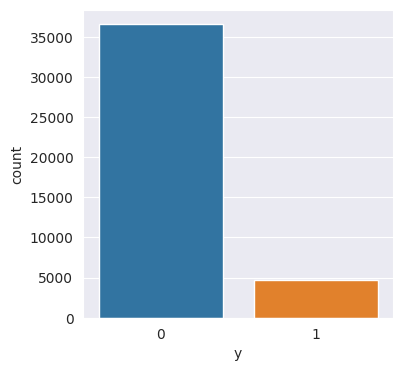

In [41]:
#The class "y" is highly imbalanced.
figure =  plt.figure(figsize = (4,4))
sns.countplot(data=df,x='y', hue='y',legend=False)
plt.show()

In [42]:
df.groupby('y').mean()

<ipython-input-42-e1dafff4daf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Some interpretations from the above:


1.   The average age of customers subscribing to the term deposit is more than that of those not subscribing.
2.   The pdays (days before a customer was contacted) is low for those subscribing to the term deposit than that of those not subscribing.(Which makes sense).




### Let's now try to visualize and understand which variables are important for our prediction.

Text(0.5, 1.0, 'Frequency of purchase for different job titles')

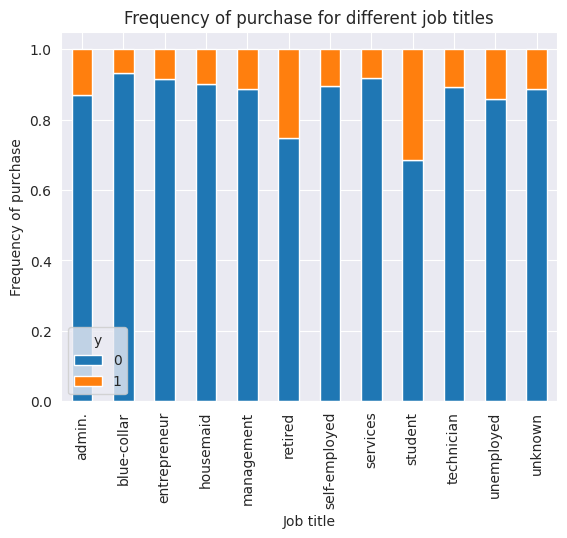

In [43]:
table = pd.crosstab(df['job'],df['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Job title')
plt.ylabel('Frequency of purchase')
plt.title('Frequency of purchase for different job titles')

Text(0, 0.5, 'Proportion of Customers')

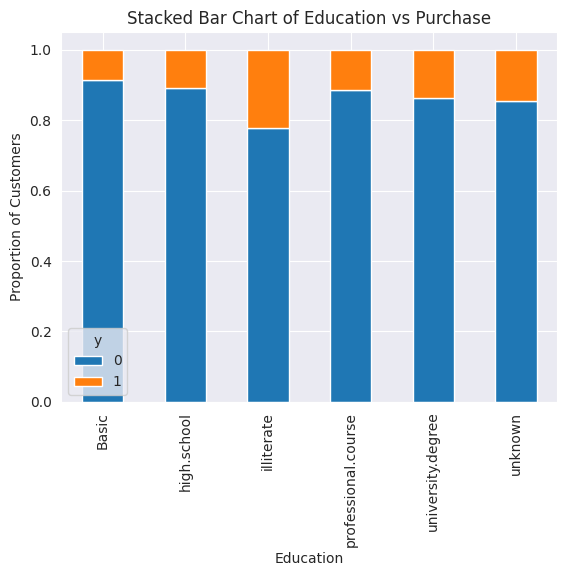

In [44]:
table = pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

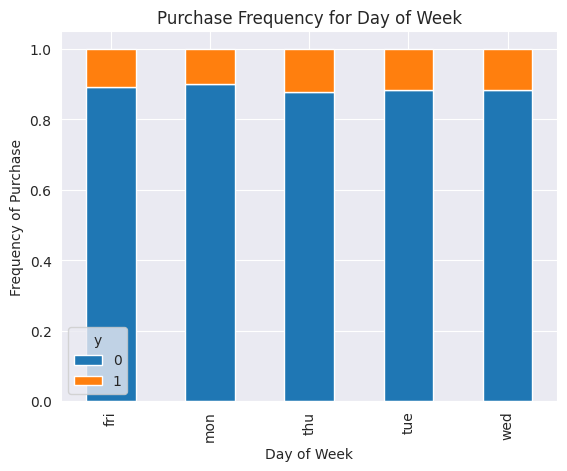

In [45]:
table = pd.crosstab(df['day_of_week'],df['y'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

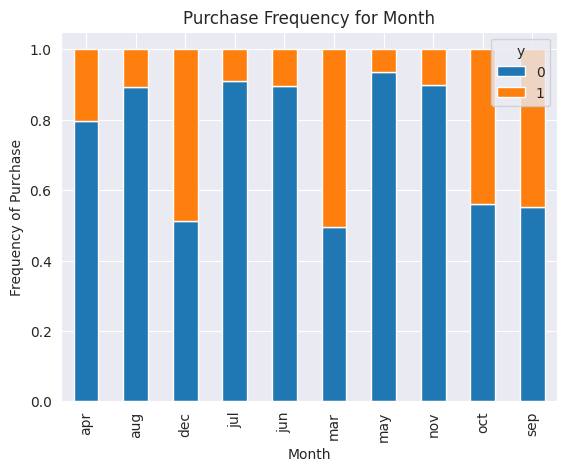

In [46]:
table = pd.crosstab(df['month'],df['y'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Text(0.5, 1.0, 'Histogram for Age')

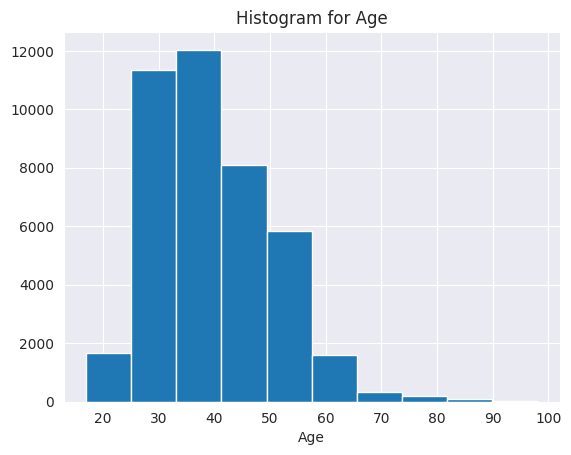

In [47]:
#Histogram of age:
plt.hist(df['age'])
plt.xlabel('Age')
plt.title('Histogram for Age')

From the above distribution, we can see that most of the customers in the bank are of age 30-40.

### Creating dummy variables

In [48]:
categorical_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in categorical_vars:
  cat_list = 'var_' + var
  cat_list = pd.get_dummies(df[var],prefix=var)
  data = df.join(cat_list)
  df = data

#dropping the categorical variables now from the original dataframe.
df_columns = df.columns.values.tolist()
keep = [i for i in df_columns if i not in categorical_vars]

In [49]:
df_final = df[keep]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

Now that we have the data ready, we know that our data is highly imbalanced. Hence, we will use SMOTE. SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

### Oversampling using SMOTE

In [60]:
X = df_final.loc[:,df_final.columns != 'y']
y = df_final.loc[:,df_final.columns == 'y']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
columns = X_train.columns
os_data_x, os_data_y = os.fit_resample(X_train,y_train)
os_df_x = pd.DataFrame(os_data_x,columns = columns)
os_df_y = pd.DataFrame(os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_x))
print("Number of NO subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  51134
Number of NO subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now, we have a perfectly balanced data. Hence, we begin with training our model.

### Recursive Feature Elimination Technique:

This technique is used to contruct a model and choose worst or best performing features.

In [70]:
vars = df_final.columns.values.tolist()
y = ['y']
X = [i for i in vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [71]:
rfe = RFE(model)
rfe = rfe.fit(os_df_x,os_df_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True  True False False False False False  True False False  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True  True  True  True  True
 False]
[29 30 26 32 25 24 23 28 22 27  5  1  1  1  4  9  3  2  8  1  7  6  1  1
  1  1  1  1 10  1  1  1  1  1 31  1  1  1  1  1  1  1  1 15 11 18 13 16
 21 14 12 20 19  1  1  1  1  1  1  1 17]


In [80]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate',
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_x[cols]
y=os_data_y['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [81]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6852  814]
 [1716 5959]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      7666
           1       0.88      0.78      0.82      7675

    accuracy                           0.84     15341
   macro avg       0.84      0.84      0.83     15341
weighted avg       0.84      0.84      0.83     15341



Interpretation: Of the entire test set, 84% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 84% of the customer’s preferred term deposits that were promoted.

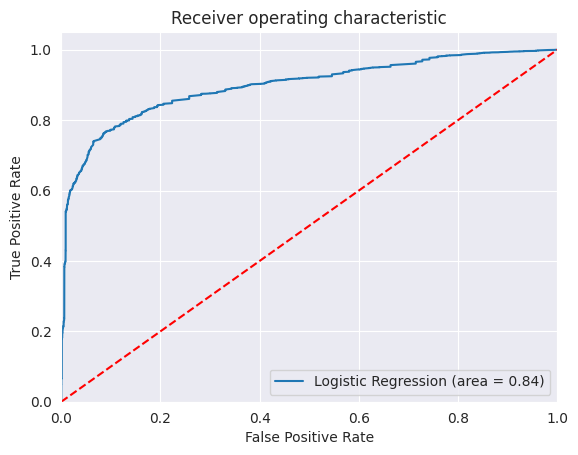

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).